In [75]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder

In [76]:
df_news = pd.read_csv("df_news_cleaned.csv")
df_news.head()

,ID,title,text,label
0,8476.0,You Can Smell Hillarys Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294.0,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608.0,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142.0,Bernie supporters on Twitter erupt in anger ag...," Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875.0,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [77]:
print(df_news['ID'].dtype)
df_news['ID'] = df_news['ID'].astype(int)
print(df_news['ID'].dtype)
df_news.head()

float64
int32


,ID,title,text,label
0,8476,You Can Smell Hillarys Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...," Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [78]:
df_news.label.value_counts()

label
REAL    3124
FAKE    3108
Name: count, dtype: int64

In [79]:
df_news['label'] = df_news['label'].replace("REAL", 1)
df_news['label'] = df_news['label'].replace("FAKE", 0)
df_news.head()

,ID,title,text,label
0,8476,You Can Smell Hillarys Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...," Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


### Preprocessing for 'title' and 'text':

In [80]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nezar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
# Function for text cleaning
# Text cleaning: Remove any special characters, symbols, or unnecessary punctuation.Convert the text to lowercase to ensure uniformity.
def clean_text(text):
    text = ''.join([c for c in text if c.isalnum() or c.isspace()])
    text = text.lower()
    return text

In [82]:
# Function for tokenization
# Tokenization: Break down the text into individual words or tokens.
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens


In [83]:
# Function for removing stopwords
# Remove stopwords: that may not contribute much to the classification task.
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

In [84]:
# Function for stemming
# Stemming :  Stemming is the process of removing prefixes and suffixes from words to obtain their root form, known as the stem.
def stem_words(tokens):
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return stemmed_tokens

In [85]:
# Function for lemmatization
# Lemmatization : Lemmatization is the process of reducing words to their base or dictionary form, known as the lemma. It involves considering a word's context and meaning.
def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [86]:
# Apply the functions to the DataFrame
df_news['title'] = df_news['title'].apply(clean_text)
df_news['title'] = df_news['title'].apply(tokenize_text)
df_news['title'] = df_news['title'].apply(remove_stopwords)
df_news['title'] = df_news['title'].apply(lemmatize_words)

df_news['text'] = df_news['text'].apply(clean_text)
df_news['text'] = df_news['text'].apply(tokenize_text)
df_news['text'] = df_news['text'].apply(remove_stopwords)
df_news['text'] = df_news['text'].apply(lemmatize_words)

In [88]:
df_news.head()

,ID,title,text,label
0,8476,"[smell, hillary, fear]","[daniel, greenfield, shillman, journalism, fel...",0
1,10294,"[watch, exact, moment, paul, ryan, committed, ...","[google, pinterest, digg, linkedin, reddit, st...",0
2,3608,"[kerry, go, paris, gesture, sympathy]","[u, secretary, state, john, f, kerry, said, mo...",1
3,10142,"[bernie, supporter, twitter, erupt, anger, dnc...","[kaydee, king, kaydeeking, november, 9, 2016, ...",0
4,875,"[battle, new, york, primary, matter]","[primary, day, new, york, frontrunners, hillar...",1


## Splitting the data

In [89]:
df_news['text'] = df_news['text'].apply(lambda words: ' '.join(words))
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df_news['text'], df_news['label'], test_size=0.2, random_state=42)

### fit and transform the vectorizer on the train set, and transform the vectorizer on the test set

In [108]:
##DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df =0.25)
## DataFlair - fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

### predict on the test set from the TfidfVectorizer and calculate the accuracy

In [109]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.91%


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics

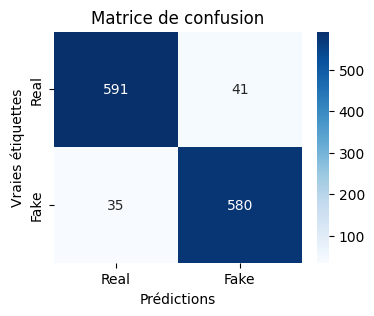

In [114]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()